In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
iris_df = pd.read_csv(r"C:\Users\Vaishali Balaji\Downloads\archive\Iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
print("The total number of rows in this dataset is",iris_df.shape[0])

The total number of rows in this dataset is 150


In [7]:
iris_df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
iris_df["Species"].nunique()

3

In [9]:
iris_df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

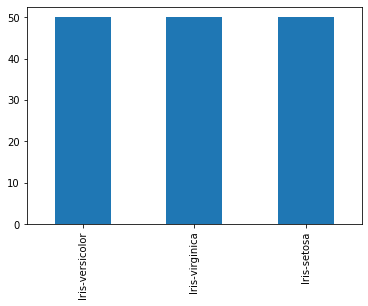

In [10]:
iris_df["Species"].value_counts().plot.bar()

In [11]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

From the above basic data exploration, we infer that there are no null values in this dataset and that there are 3 classes in the output-"Species" column with equal representation.

In [14]:
iris_df.drop("Id", axis=1, inplace = True)

**Let's split our data into X & y**

In [15]:
X = iris_df.drop("Species", axis =1)
y = iris_df["Species"]

In [16]:
X.shape

(150, 4)

In [17]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [18]:
label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y)
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
iris_df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

By the rule of Label Encoder algorithm, we could infer that 
- 0 -> Iris-setosa
- 1 -> Iris-versicolor
- 2 -> Iris-virginica

**Let's split our data into train and test sets**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25 , random_state =21)

In [23]:
print("No. of data points in the training dataset is", X_train.shape[0])
print("No. of data points in the testing dataset is",X_test.shape[0])

No. of data points in the training dataset is 112
No. of data points in the testing dataset is 38


**Let's build our KNN model**

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=4) #n_neighbors is the K value and by default, it's value is equal to 5

In [27]:
knn_model.fit(X_train,y_train) #suprvised learning

KNeighborsClassifier(n_neighbors=4)

In [28]:
y_test_pred_knn = knn_model.predict(X_test)
y_train_pred_knn = knn_model.predict(X_train)

**Evaluating our Knn model**

In [29]:
print("The accuracy score of the Knn model on the test dataset is", accuracy_score(y_test,y_test_pred_knn))

The accuracy score of the Knn model on the test dataset is 0.9473684210526315


In [30]:
print("The accuracy score of the Knn model on the train dataset is", accuracy_score(y_train,y_train_pred_knn))

The accuracy score of the Knn model on the train dataset is 0.9642857142857143


We can infer that this is an appropriate fit model.

**Let's experiment with higher K or n_neighbors value**

In [39]:
knn_high_model = KNeighborsClassifier(n_neighbors=20)
knn_high_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [40]:
y_test_high_pred_knn = knn_high_model.predict(X_test)
y_train_high_pred_knn = knn_high_model.predict(X_train)

In [43]:
print("The accuracy score of the Knn model on the train dataset is", accuracy_score(y_train,y_train_high_pred_knn))

The accuracy score of the Knn model on the train dataset is 0.9821428571428571


In [42]:
print("The accuracy score of the Knn model on the test dataset is", accuracy_score(y_test,y_test_high_pred_knn))

The accuracy score of the Knn model on the test dataset is 0.868421052631579


From above, we can infer that a higher K value can reduce the model performance on test dataset and can also result in an over-fitting model.

**Let's build an SVM model for the iris dataset**

In [44]:
from sklearn.svm import SVC

In [45]:
svc_model = SVC()

In [46]:
svc_model.fit(X_train,y_train)

SVC()

In [47]:
y_test_pred_svc = svc_model.predict(X_test)
y_train_pred_svc = svc_model.predict(X_train)

**Evaluating our SVC model**

In [48]:
print("The accuracy score of the SVC model on the train dataset is", accuracy_score(y_train,y_train_pred_svc))

The accuracy score of the SVC model on the train dataset is 0.9910714285714286


In [49]:
print("The accuracy score of the SVC model on the test dataset is", accuracy_score(y_test,y_test_pred_svc))

The accuracy score of the SVC model on the test dataset is 0.9210526315789473


In [51]:
print(classification_report(y_test,y_test_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.87      0.90        15
           2       0.82      0.90      0.86        10

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



**After class work**
- Try experimenting with different test_size values
- Try experimenting with different random_state seed numbers. For eg: 5, 42
- Try experimenting the KNN model with different K-values

# End of discussion